In [1]:
import numpy as np
from scipy.misc import imresize
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from skimage import transform, filters
import sys, pylab, operator, csv
#import util
import os
import urllib

%matplotlib notebook

%load_ext autoreload
%autoreload 2

import caffe

from helpers import *
from heatmaps import *
from repro_EB_figs import *
from optimize_mask import *

In [2]:
gpu = 0
net_type = 'googlenet'

caffe.set_device(gpu)
caffe.set_mode_gpu()

net = get_net(net_type)

In [3]:
labels_desc = np.loadtxt('/home/ruthfong/packages/caffe/data/ilsvrc12/synset_words.txt', str, delimiter='\t')
synsets = np.loadtxt('/home/ruthfong/packages/caffe/data/ilsvrc12/synsets.txt', str, delimiter='\t')

In [4]:
def find_labels(phrase, labels_desc = np.loadtxt('/home/ruthfong/packages/caffe/data/ilsvrc12/synset_words.txt', str, delimiter='\t')):
    indicator = [phrase in label for label in labels_desc]
    try:
        return np.where(indicator)[0]
    except:
        return None

In [5]:
phrases = ['panda', 'tiger', 'gorilla', 'lion', 'elephant']

for phrase in phrases:
    print phrase
    idx = find_labels(phrase)
    for i in idx:
        print i, labels_desc[i]
        
print ''

interested_labels = [388, # n02510455 giant panda
                     292, # n02129604 tiger
                     366, # n02480855 gorilla
                     291, # n02129165 lion
                     386, # n02504458 African elephant
                    ]

for l in interested_labels:
    print l, labels_desc[l]

panda
387 n02509815 lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens
388 n02510455 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
tiger
3 n01491361 tiger shark, Galeocerdo cuvieri
282 n02123159 tiger cat
292 n02129604 tiger, Panthera tigris
300 n02165105 tiger beetle
gorilla
366 n02480855 gorilla, Gorilla gorilla
lion
150 n02077923 sea lion
286 n02125311 cougar, puma, catamount, mountain lion, painter, panther, Felis concolor
291 n02129165 lion, king of beasts, Panthera leo
396 n02643566 lionfish
elephant
385 n02504013 Indian elephant, Elephas maximus
386 n02504458 African elephant, Loxodonta africana

388 n02510455 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
292 n02129604 tiger, Panthera tigris
366 n02480855 gorilla, Gorilla gorilla
291 n02129165 lion, king of beasts, Panthera leo
386 n02504458 African elephant, Loxodonta africana


388 n02510455 giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca


/home/ruthfong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in log10
/home/ruthfong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:51: RuntimeWarning: divide by zero encountered in log10


<IPython.core.display.Javascript object>


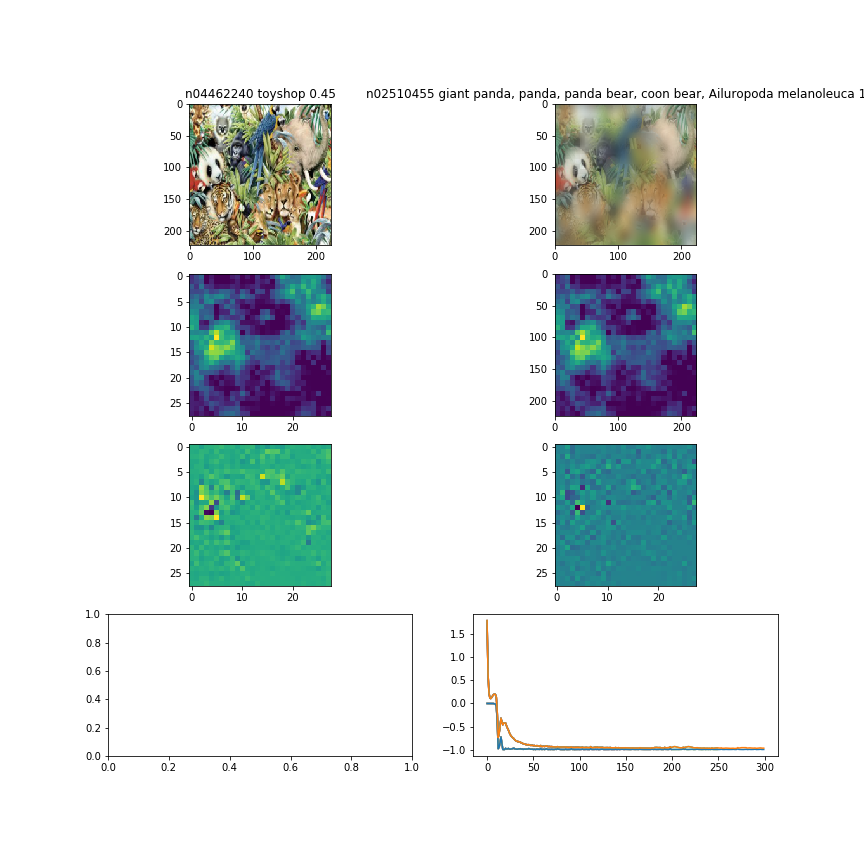

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_fnn_figs_given_grad_1_norm_0/min_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_l1_ideal_0_l1_lambda_2_-inf_tv_lambda_-2.00_beta_3.00_mask_scale_8_blur_mask_0_jitter_4_noise_-inf_num_iters_300_tv2_mask_init/388.npy
292 n02129604 tiger, Panthera tigris


<IPython.core.display.Javascript object>


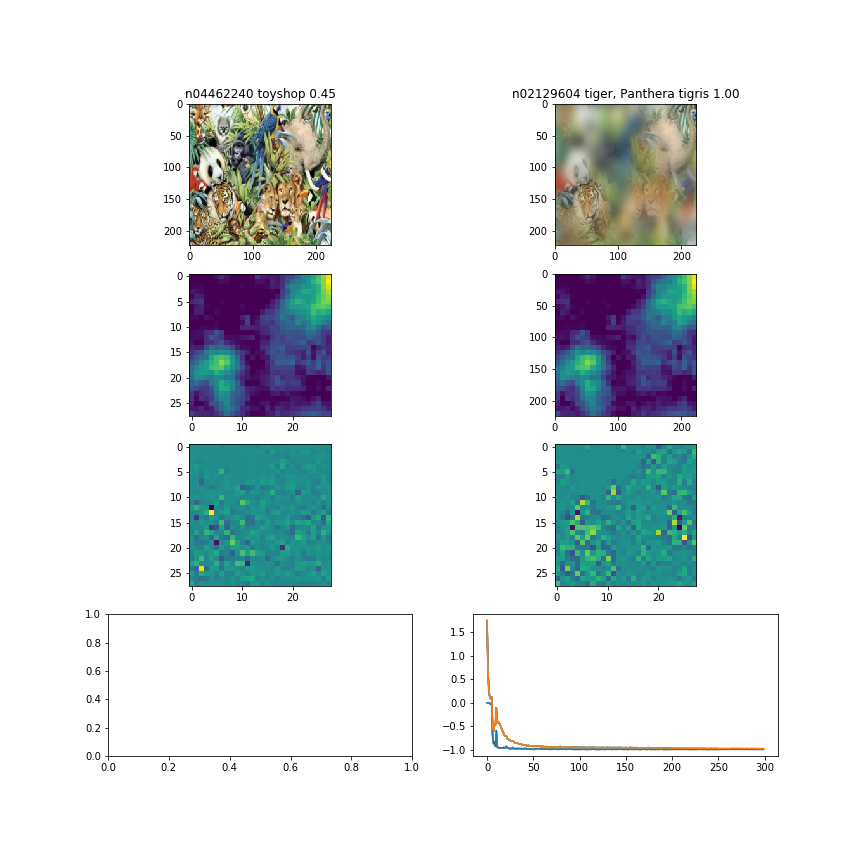

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_fnn_figs_given_grad_1_norm_0/min_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_l1_ideal_0_l1_lambda_2_-inf_tv_lambda_-2.00_beta_3.00_mask_scale_8_blur_mask_0_jitter_4_noise_-inf_num_iters_300_tv2_mask_init/292.npy
366 n02480855 gorilla, Gorilla gorilla


<IPython.core.display.Javascript object>


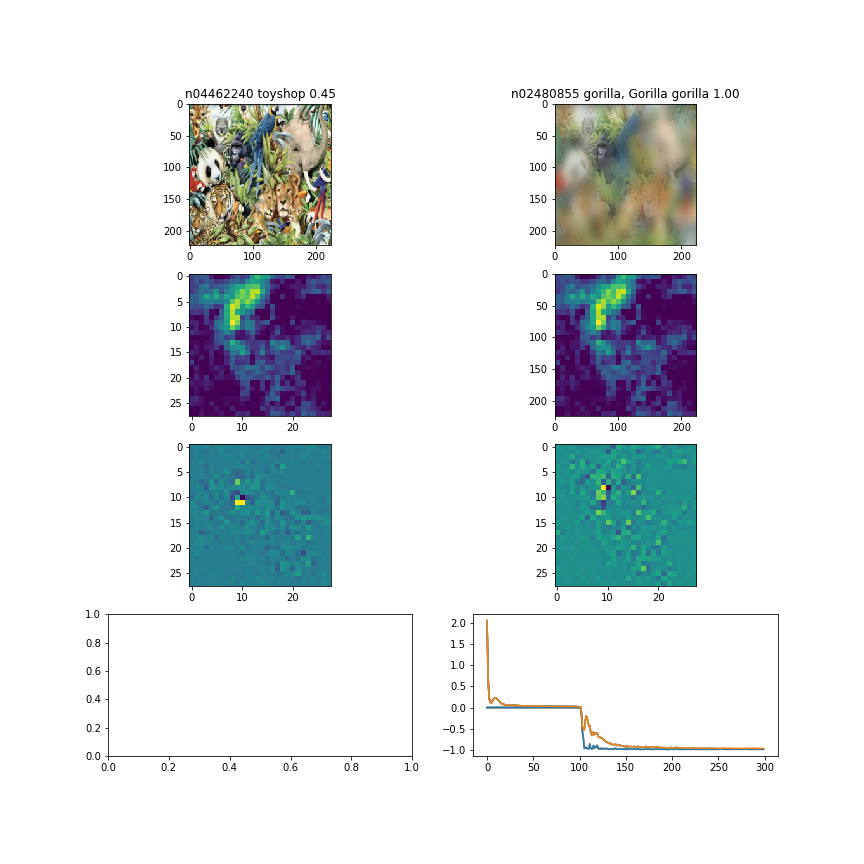

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_fnn_figs_given_grad_1_norm_0/min_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_l1_ideal_0_l1_lambda_2_-inf_tv_lambda_-2.00_beta_3.00_mask_scale_8_blur_mask_0_jitter_4_noise_-inf_num_iters_300_tv2_mask_init/366.npy
291 n02129165 lion, king of beasts, Panthera leo


<IPython.core.display.Javascript object>


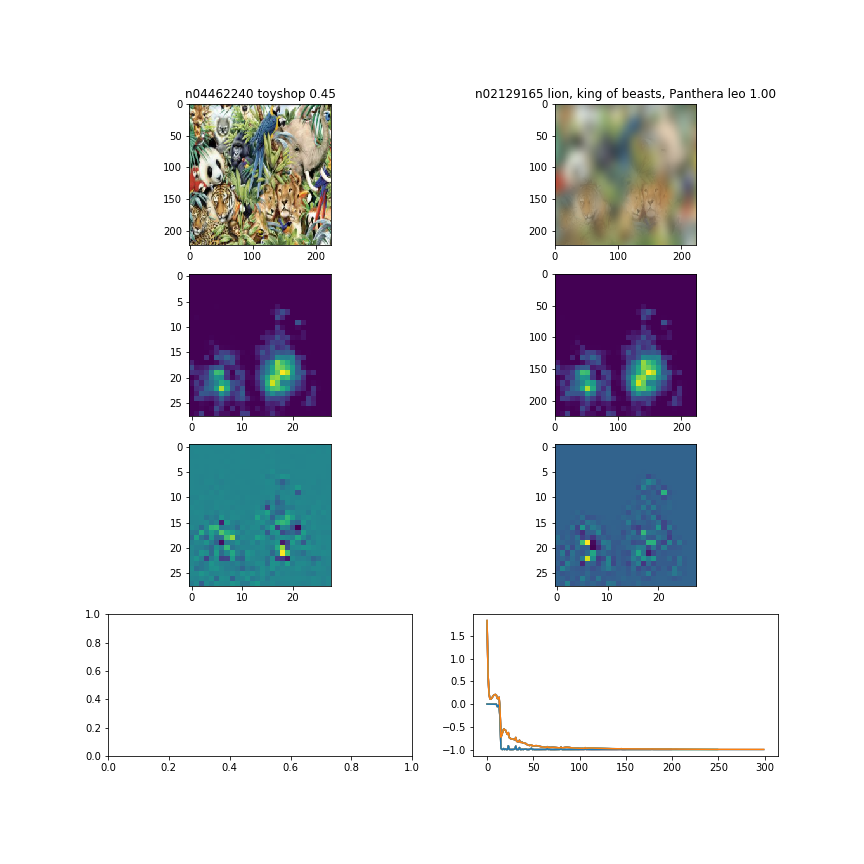

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_fnn_figs_given_grad_1_norm_0/min_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_l1_ideal_0_l1_lambda_2_-inf_tv_lambda_-2.00_beta_3.00_mask_scale_8_blur_mask_0_jitter_4_noise_-inf_num_iters_300_tv2_mask_init/291.npy
386 n02504458 African elephant, Loxodonta africana


<IPython.core.display.Javascript object>


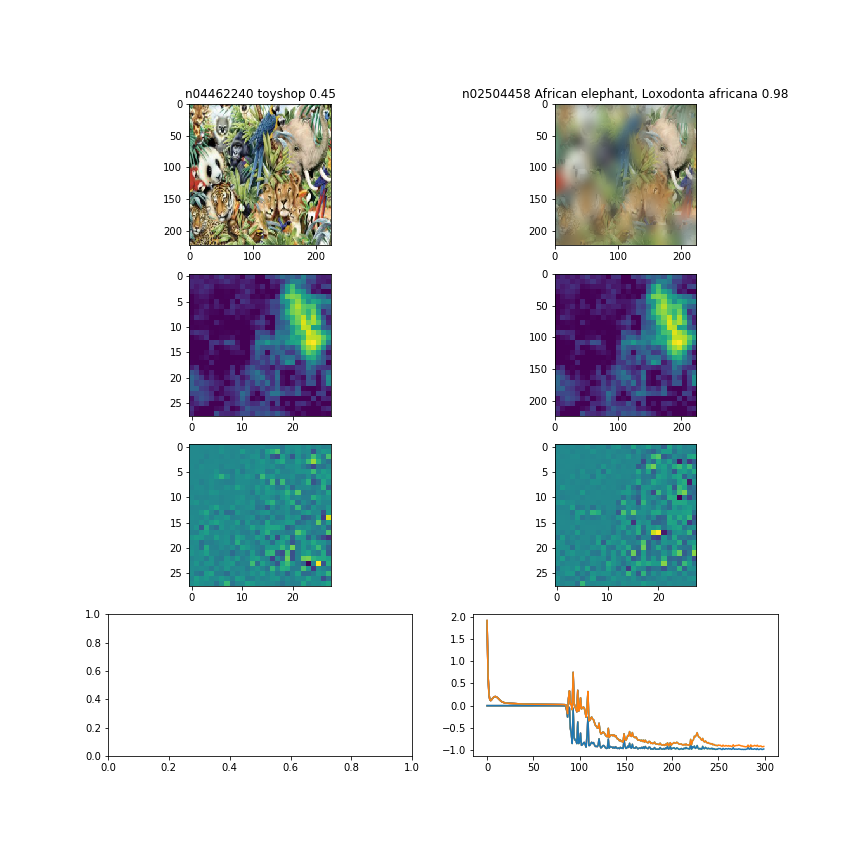

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_fnn_figs_given_grad_1_norm_0/min_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_l1_ideal_0_l1_lambda_2_-inf_tv_lambda_-2.00_beta_3.00_mask_scale_8_blur_mask_0_jitter_4_noise_-inf_num_iters_300_tv2_mask_init/386.npy


In [51]:
import optimize_mask
reload(optimize_mask)
from optimize_mask import *

comic_img_path = '/home/ruthfong/neural_coding/fnn_images/comic_book_cluttered_image.jpg'
data_desc = 'fnn_figs'

%matplotlib notebook

num_iters = 300
lr = 1e-1
l1_lambda = 1e-4
l1_ideal = 0
l1_lambda_2 = 0
tv_lambda = 1e-2
tv_beta = 3
jitter = 4
num_top = 0
noise = 0
null_type = 'blur'
given_gradient = True
norm_score = False
end_layer = 'prob'
use_conv_norm = False
blur_mask = 0
mask_scale = 8

net_transformer = get_ILSVRC_net_transformer(net)
for label in interested_labels:
    print label, labels_desc[label]
    path = comic_img_path
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    assert(given_gradient)
    assert(num_top == 0)
    target = np.zeros(scores.shape)
    target[label] = -1

    #mask_radius = test_circular_masks(net, path, label, plot = False)
    #mask_init = 1-create_blurred_circular_mask((net.blobs['data'].data.shape[2], net.blobs['data'].data.shape[3]),
    #                                     mask_radius, center = None, sigma = 10)
    #mask_init = np.ones((net.blobs['data'].data.shape[2], net.blobs['data'].data.shape[3]))
    fig_path = None
    mask_path = None
    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%.2f_l1_lambda_%.2f_l1_ideal_%d_l1_lambda2_%.2f_tv_lambda_%.2f_beta_%.2f_mask_scale_%d_blur_mask_%d_jitter_%d_noise_%.1f_num_iters_%d_tv2_mask_init/%d.png' % (
        net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, np.log10(lr), np.log10(l1_lambda),l1_ideal, np.log10(l1_lambda_2), np.log10(tv_lambda), tv_beta, mask_scale, blur_mask, jitter, np.log10(noise), num_iters, label))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%.2f_l1_lambda_%.2f_l1_ideal_%d_l1_lambda_2_%.2f_tv_lambda_%.2f_beta_%.2f_mask_scale_%d_blur_mask_%d_jitter_%d_noise_%.1f_num_iters_%d_tv2_mask_init/%d.npy' % (
        net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, np.log10(lr), np.log10(l1_lambda), l1_ideal, np.log10(l1_lambda_2), np.log10(tv_lambda), tv_beta, mask_scale, blur_mask, jitter, np.log10(noise), num_iters, label))


    if os.path.exists(mask_path):
        print '%s already exists so skipping' % mask_path
        continue

    optimize_mask(net, path, target, labels = labels_desc, given_gradient = given_gradient, norm_score = norm_score,
                        num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, l1_ideal = l1_ideal,
                        l1_lambda_2 = l1_lambda_2, tv_lambda = tv_lambda, tv_beta = tv_beta, mask_scale = mask_scale,
                        use_conv_norm= use_conv_norm, blur_mask = blur_mask, jitter = jitter,
                        null_type = null_type, mask_init = mask_init, gpu = gpu, start_layer = None, end_layer = end_layer,
                        plot_step = 50, debug = False, fig_path = fig_path, mask_path = mask_path)

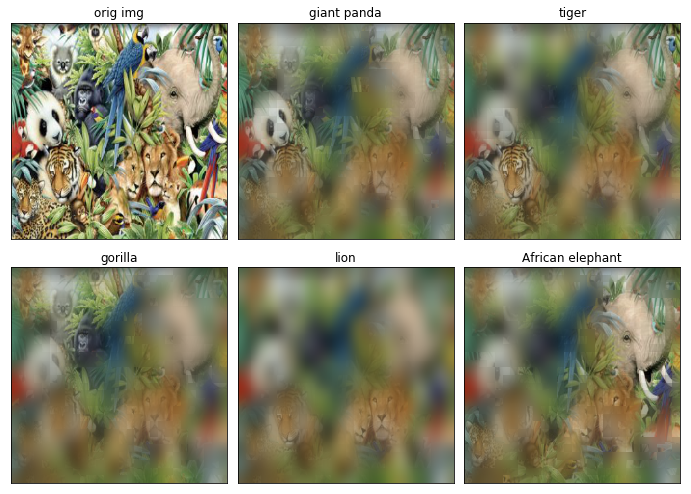

In [16]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (12.0, 9.0)

comic_img_path = '/home/ruthfong/neural_coding/fnn_images/comic_book_cluttered_image.jpg'
net_transformer = get_ILSVRC_net_transformer(net)

f, ax = plt.subplots(2,3)
img = caffe.io.load_image(comic_img_path)
null_img = get_blurred_img(comic_img_path, radius = 10)
img_ = net_transformer.preprocess('data', img)
null_img_ = net_transformer.preprocess('data', null_img) - 30
ax[0][0].imshow(net_transformer.deprocess('data', img_))
#ax[0].imshow(img)
ax[0][0].set_title('orig img')
ax[0][0].get_xaxis().set_visible(False)
ax[0][0].get_yaxis().set_visible(False)

for i in range(len(interested_labels)):
    label = interested_labels[i]
    mask = np.load('/data/ruthfong/neural_coding/pycaffe_results/googlenet_fnn_figs_given_grad_1_norm_0/min_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_l1_ideal_0_l1_lambda_2_-inf_tv_lambda_-2.00_beta_3.00_mask_scale_8_blur_mask_0_jitter_4_noise_-inf_num_iters_300_tv2_mask_init/%d.npy' % label)
    ax[(i+1)/3][(i+1)%3].imshow(img)
    #ax[i+1].imshow(imresize(mask, img.shape[:2]), alpha = 0.5, cmap='jet')
    ax[(i+1)/3][(i+1)%3].imshow(net_transformer.deprocess('data', img_ * mask + null_img_ * (1 - mask)))
    ax[(i+1)/3][(i+1)%3].get_xaxis().set_visible(False)
    ax[(i+1)/3][(i+1)%3].get_yaxis().set_visible(False)
    ax[(i+1)/3][(i+1)%3].set_title(get_short_class_name(label))
f.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig('/home/ruthfong/neural_coding/paper_figures/comic_book_masked_imgs.pdf', bbox_inches='tight', pad_inches=0.0)

<IPython.core.display.Javascript object>


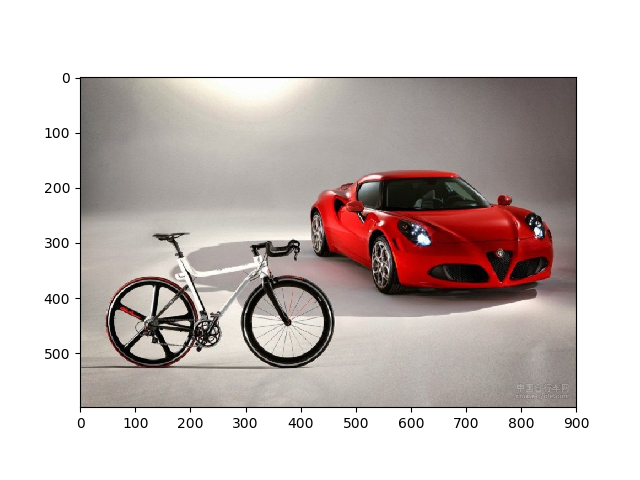

817 sports car 0.519252
751 racer 0.313658
479 car wheel 0.0884748
511 convertible 0.0176229
870 tricycle 0.0132347
518 crash helmet 0.00448795
436 beach wagon 0.00417355
882 vacuum 0.00300024
671 mountain bike 0.0027926
880 unicycle 0.00198454
535 disk brake 0.00132789
581 grille 0.00123596
665 moped 0.000907715
864 tow truck 0.000781671
468 cab 0.000766553
621 lawn mower 0.000723479
717 pickup 0.000553373
475 car mirror 0.000550364
752 racket 0.000547394
661 Model T 0.000494916
589 hand blower 0.000469504
818 spotlight 0.000461783
704 parking meter 0.000417328
859 toaster 0.0004113
655 miniskirt 0.000381964



In [7]:
transformer = get_ILSVRC_net_transformer(net)
fnn_dir = '/home/ruthfong/neural_coding/fnn_images'
mult_obj_paths = [os.path.join(fnn_dir, f) for f in ['dog-cat1.jpg', 'dog-cat2.jpg', 'dog-cat3.jpg', 'dog-cat4.jpg',
                                                    'bic-car1.jpg', 'bic-car2.jpg', 'zeb-ele1.jpg', 'zeb-ele2.jpg']]
idx = [4]
for i in idx:
    img = caffe.io.load_image(mult_obj_paths[i])
    img_ = transformer.preprocess('data', img)
    f, ax = plt.subplots(1,1)
    ax.imshow(img)
    scores = np.squeeze(forward_pass(net, img_))
    sorted_idx = np.argsort(scores)[::-1]
    for j in range(25):
        print sorted_idx[j], get_short_class_name(sorted_idx[j]), scores[sorted_idx[j]] 
    print ''

162 n02088364 beagle


/home/ruthfong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: divide by zero encountered in log10
/home/ruthfong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in log10


<IPython.core.display.Javascript object>


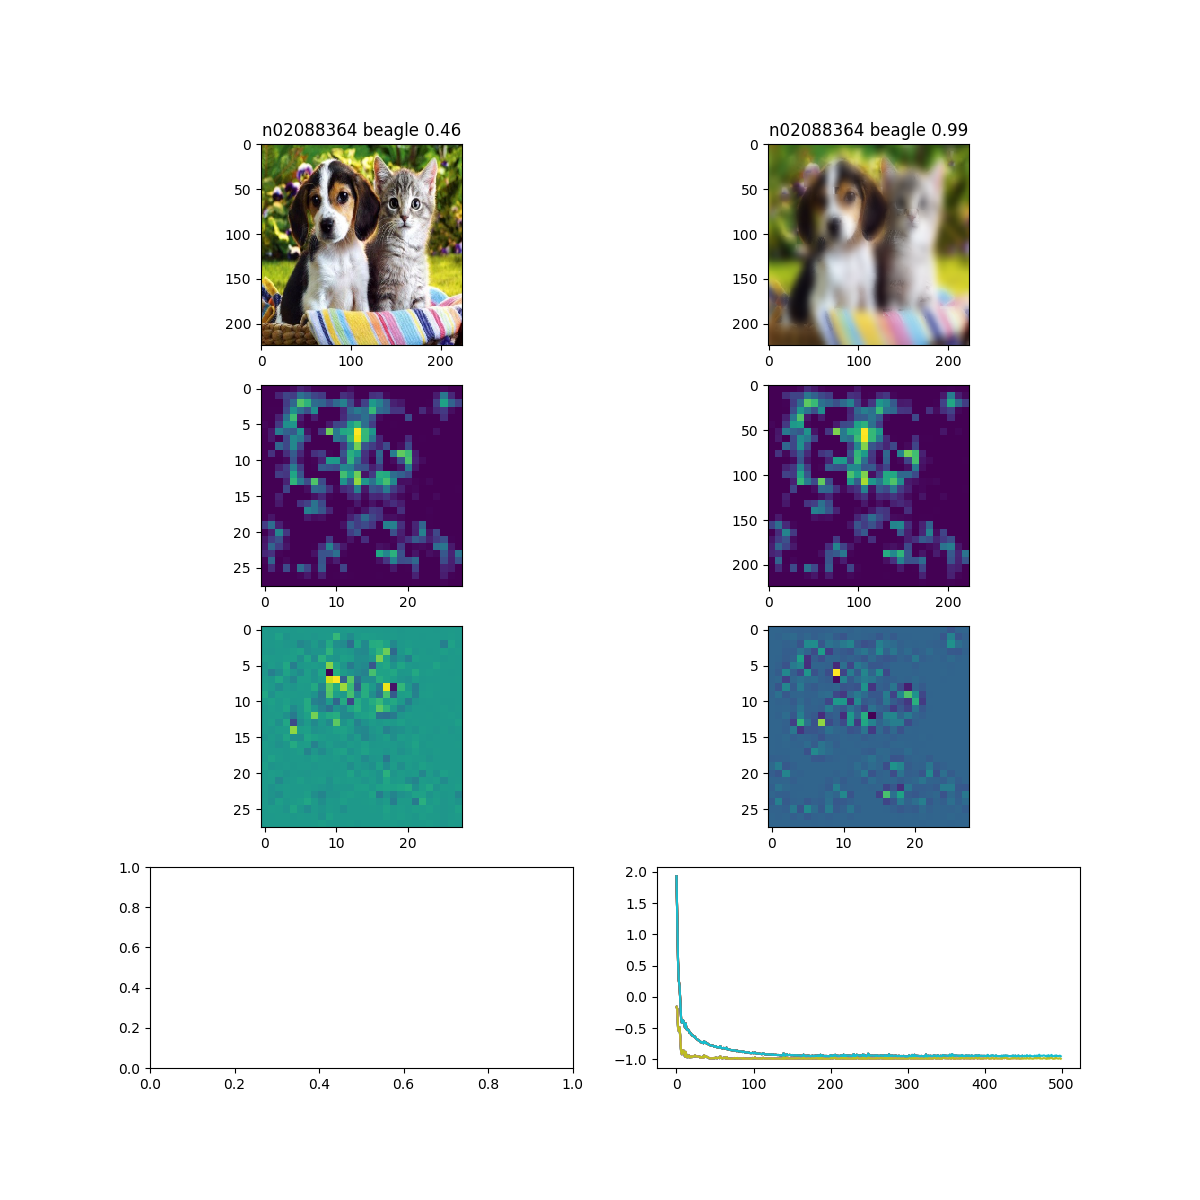

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_fnn_figs_given_grad_1_norm_0/l1_ideal_0_top0_prob_blur/lr_-1.30_l1_lambda_-3.30_l1_ideal_0_l1_lambda_2_-inf_tv_lambda_-2.00_beta_3.00_mask_scale_8_blur_mask_0_jitter_4_noise_-inf_num_iters_500_tv2_mask_init/dog-cat-162.npy
281 n02123045 tabby, tabby cat


<IPython.core.display.Javascript object>


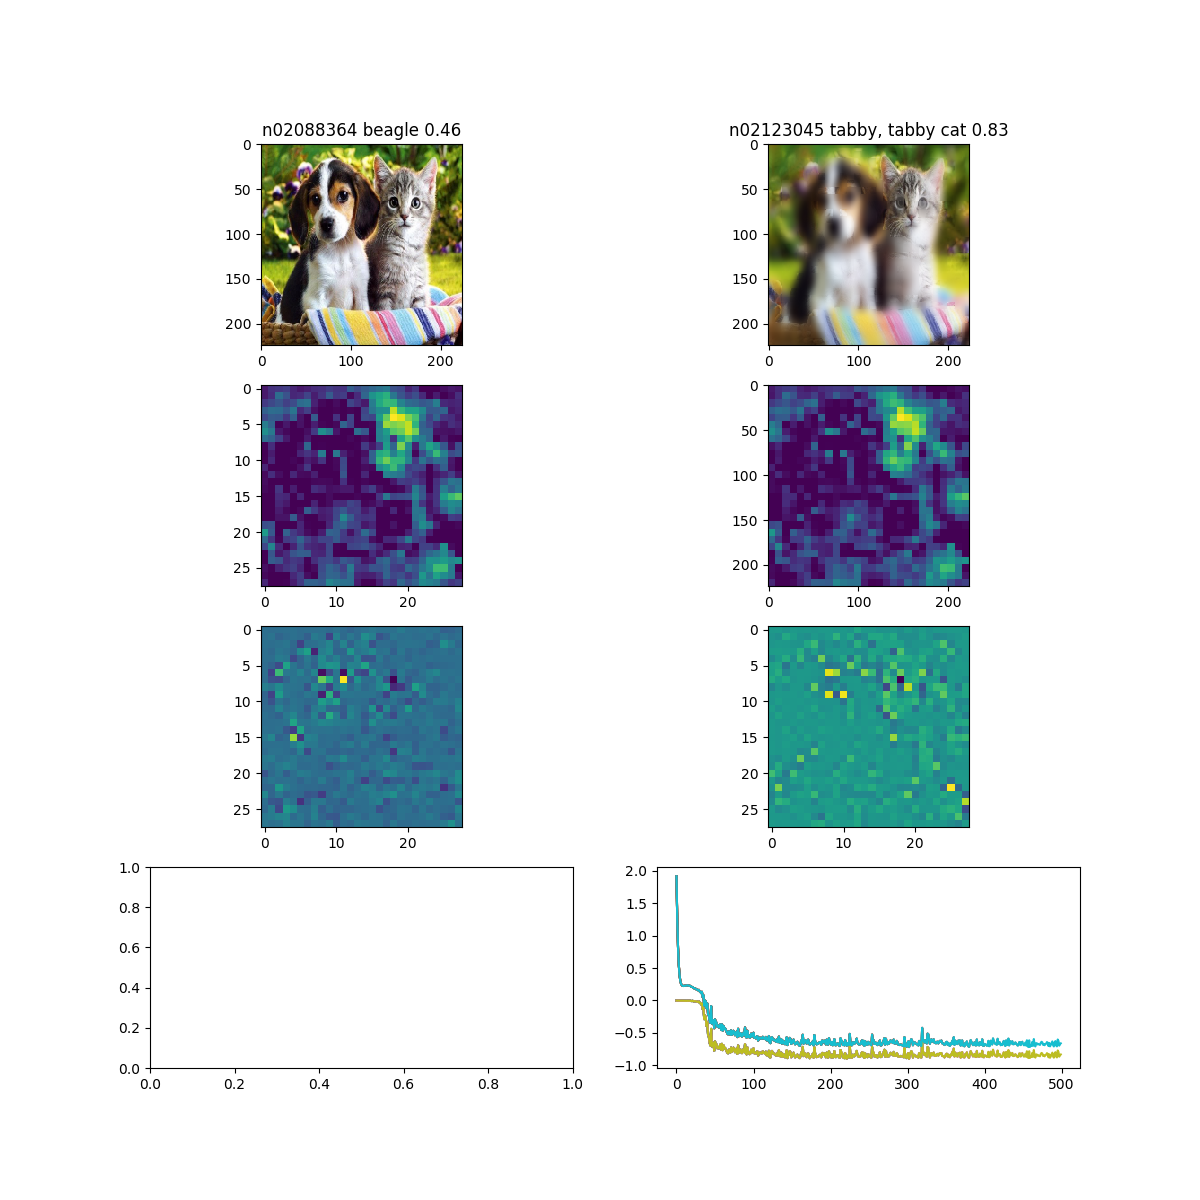

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_fnn_figs_given_grad_1_norm_0/l1_ideal_0_top0_prob_blur/lr_-1.30_l1_lambda_-3.30_l1_ideal_0_l1_lambda_2_-inf_tv_lambda_-2.00_beta_3.00_mask_scale_8_blur_mask_0_jitter_4_noise_-inf_num_iters_500_tv2_mask_init/dog-cat-281.npy


In [18]:
interested_labels = [162, # beagle
                    281 # tabby
                   ]
#interested_labels = [340, # zebra 0.950043
#                    386 # African elephant 0.0324306
#                    ]
#interested_labels = [817, #sports car 0.519252
#                    671 #mountain bike 0.0027926
#                    ]
path = mult_obj_paths[1]
data_desc = 'fnn_figs'

num_iters = 500
lr = 5e-2
l1_lambda = 5e-4
l1_ideal = 0
l1_lambda_2 = 0
tv_lambda = 1e-2
tv_beta = 3
jitter = 4
num_top = 0
noise = 0
null_type = 'blur'
given_gradient = True
norm_score = False
end_layer = 'prob'
use_conv_norm = False
blur_mask = 0
mask_scale = 8

for label in interested_labels:
    print label, labels_desc[label]
    img = transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    assert(given_gradient)
    assert(num_top == 0)
    target = np.zeros(scores.shape)
    target[label] = -1

    #mask_radius = test_circular_masks(net, path, label, plot = False)
    #mask_init = 1-create_blurred_circular_mask((net.blobs['data'].data.shape[2], net.blobs['data'].data.shape[3]),
    #                                     mask_radius, center = None, sigma = 10)
    #mask_init = create_blurred_circular_mask((net.blobs['data'].data.shape[2], net.blobs['data'].data.shape[3]),
    #                                 mask_radius, center = None, sigma = 10)
    #mask_init = np.ones((net.blobs['data'].data.shape[2], net.blobs['data'].data.shape[3]))
    mask_init = None
    fig_path = None
    mask_path = None
    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d_norm_%d/l1_ideal_%d_top%d_%s_%s/lr_%.2f_l1_lambda_%.2f_l1_ideal_%d_l1_lambda2_%.2f_tv_lambda_%.2f_beta_%.2f_mask_scale_%d_blur_mask_%d_jitter_%d_noise_%.1f_num_iters_%d_tv2_mask_init/dog-cat-%d.png' % (
        net_type, data_desc, int(given_gradient), int(norm_score), l1_ideal, num_top, end_layer, null_type, np.log10(lr), np.log10(l1_lambda),l1_ideal, np.log10(l1_lambda_2), np.log10(tv_lambda), tv_beta, mask_scale, blur_mask, jitter, np.log10(noise), num_iters, label))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d_norm_%d/l1_ideal_%d_top%d_%s_%s/lr_%.2f_l1_lambda_%.2f_l1_ideal_%d_l1_lambda_2_%.2f_tv_lambda_%.2f_beta_%.2f_mask_scale_%d_blur_mask_%d_jitter_%d_noise_%.1f_num_iters_%d_tv2_mask_init/dog-cat-%d.npy' % (
        net_type, data_desc, int(given_gradient), int(norm_score), l1_ideal, num_top, end_layer, null_type, np.log10(lr), np.log10(l1_lambda), l1_ideal, np.log10(l1_lambda_2), np.log10(tv_lambda), tv_beta, mask_scale, blur_mask, jitter, np.log10(noise), num_iters, label))


    #if os.path.exists(mask_path):
    #    print '%s already exists so skipping' % mask_path
    #    continue

    optimize_mask(net, path, target, labels = labels_desc, given_gradient = given_gradient, norm_score = norm_score,
                        num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, l1_ideal = l1_ideal,
                        l1_lambda_2 = l1_lambda_2, tv_lambda = tv_lambda, tv_beta = tv_beta, mask_scale = mask_scale,
                        use_conv_norm= use_conv_norm, blur_mask = blur_mask, jitter = jitter,
                        null_type = null_type, mask_init = mask_init, gpu = gpu, start_layer = None, end_layer = end_layer,
                        plot_step = 50, debug = False, fig_path = fig_path, mask_path = mask_path)

<IPython.core.display.Javascript object>


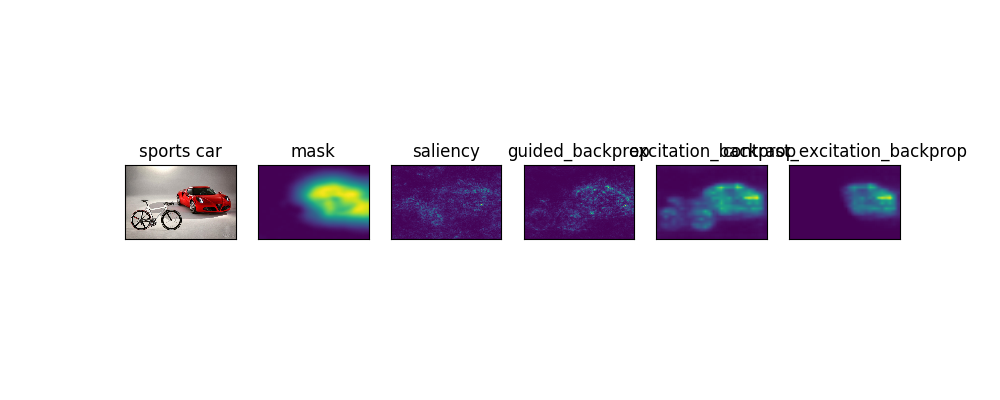

<IPython.core.display.Javascript object>


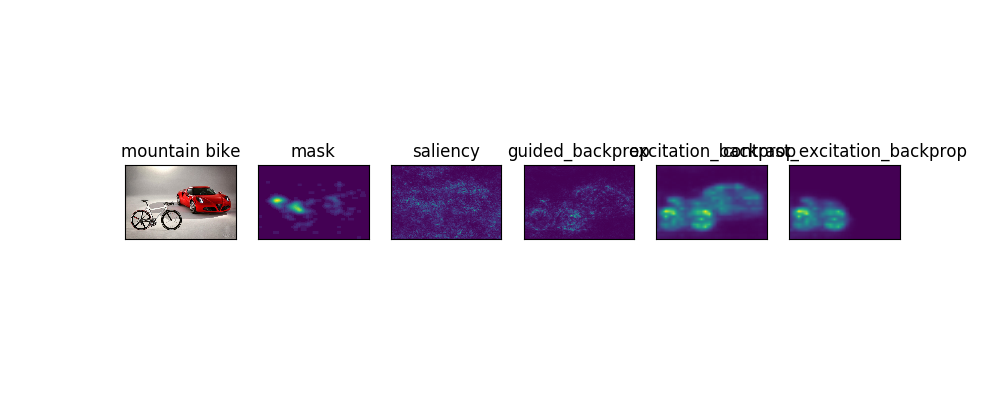

In [31]:
import heatmaps
reload(heatmaps)
from heatmaps import *

for label in interested_labels:
    mask_path = '/data/ruthfong/neural_coding/pycaffe_results/googlenet_fnn_figs_given_grad_1_norm_0/l1_ideal_1_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_l1_ideal_1_l1_lambda_2_-inf_tv_lambda_-2.00_beta_3.00_mask_scale_8_blur_mask_5_jitter_4_noise_-inf_num_iters_300_tv2_mask_init/bike-car-%d.npy' % label
    visualize_heatmaps(net, path, mask_path, label, show_bbs = False, gpu = gpu)

<IPython.core.display.Javascript object>


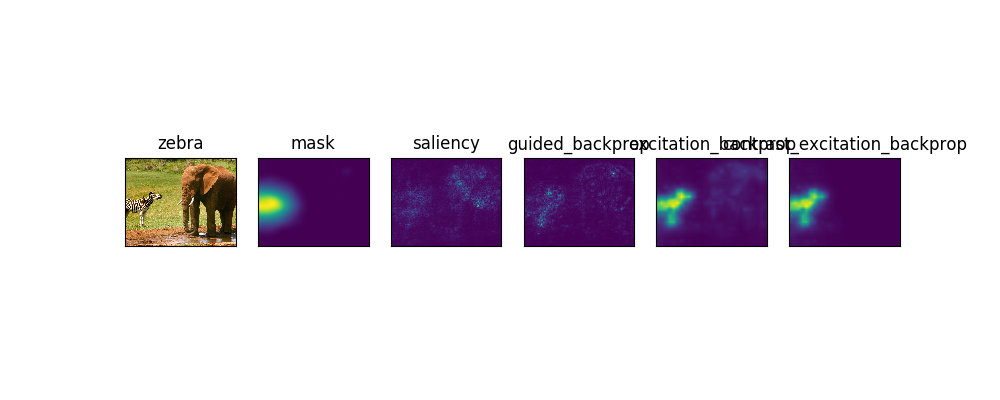

<IPython.core.display.Javascript object>


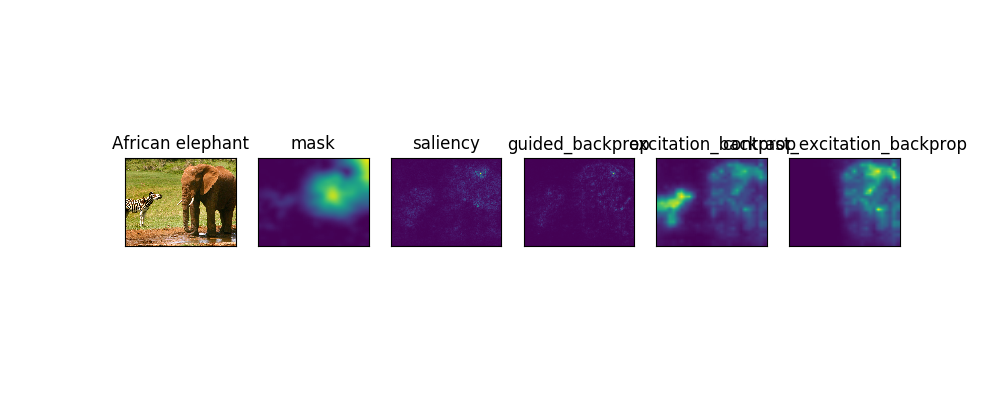

In [26]:
import heatmaps
reload(heatmaps)
from heatmaps import *

for label in interested_labels:
    mask_path = '/data/ruthfong/neural_coding/pycaffe_results/googlenet_fnn_figs_given_grad_1_norm_0/l1_ideal_1_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_l1_ideal_1_l1_lambda_2_-inf_tv_lambda_-2.00_beta_3.00_mask_scale_8_blur_mask_5_jitter_4_noise_-inf_num_iters_300_tv2_mask_init/zeb-ele1-%d.npy' % label
    visualize_heatmaps(net, path, mask_path, label, show_bbs = False, gpu = gpu)